In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load the dataset weatherHistory.csv

In [2]:
df = pd.read_csv('weatherHistory.csv')
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


### Get rid of non-numerical columns of the dataset

In [3]:
df.drop(['Formatted Date', 'Summary', 'Precip Type', 'Daily Summary'], axis=1, inplace=True)
df.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51


### Use 'Temperature (C)' as your target variable. Plot the relationship of each of the numerical features with the target variable

## Don't take `Apparent Temperature (C)` as a feature it's a copy of 'Temperature(C)'

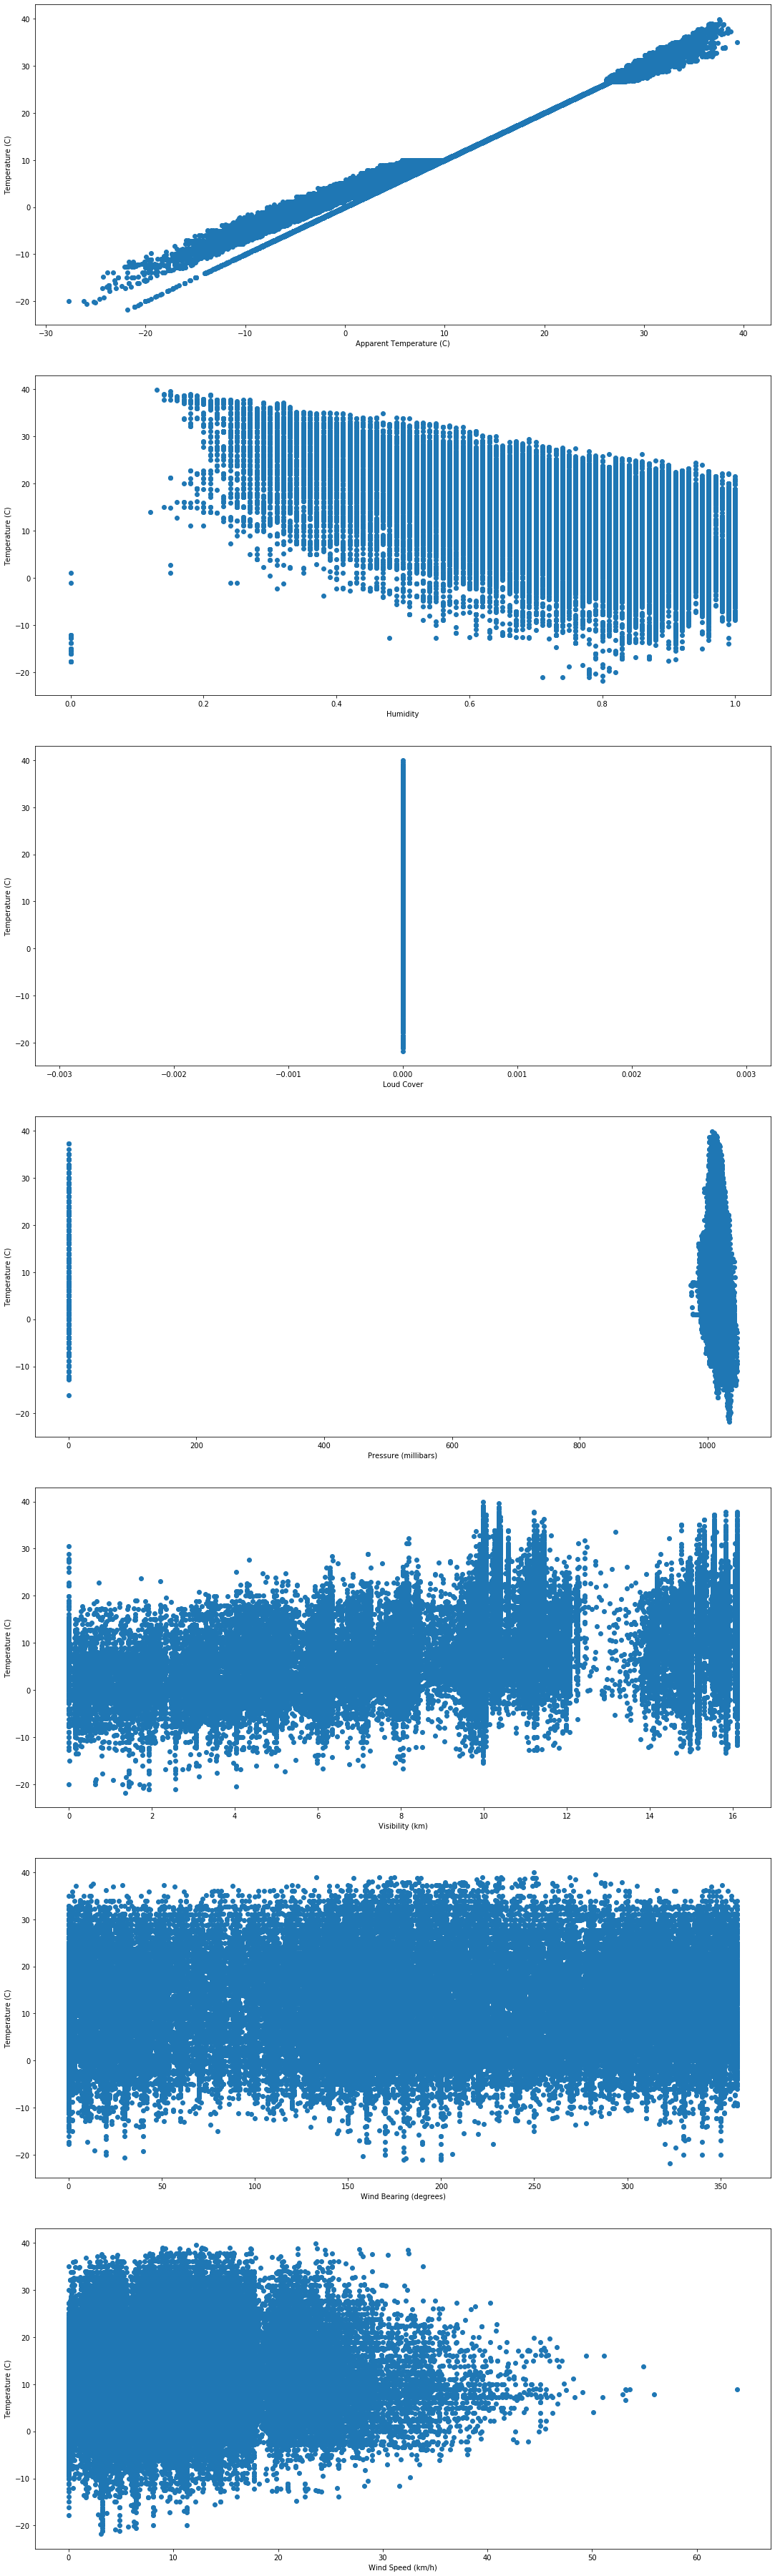

In [4]:
y = df['Temperature (C)']
X = df[df.columns.difference(['Temperature (C)'])]

fig, ax = plt.subplots(7,1)
fig.set_figwidth(15)
fig.set_figheight(50)
fig.tight_layout(h_pad=5)

for i, feature in enumerate(X.columns):
    ax[i].scatter(df[feature],y)
    ax[i].set_xlabel(feature)
    ax[i].set_ylabel('Temperature (C)')
   

In [5]:
df.corr()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
Temperature (C),1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,NaN,-0.005447
Apparent Temperature (C),0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,NaN,-0.000219
Humidity,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,NaN,0.005454
Wind Speed (km/h),0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,NaN,-0.049263
Wind Bearing (degrees),0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,NaN,-0.011651
Visibility (km),0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,NaN,0.059818
Loud Cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pressure (millibars),-0.005447,-0.000219,0.005454,-0.049263,-0.011651,0.059818,NaN,1.000000


### Leave only one feature that has a linear relationship with the target variable.

In [6]:
df = df[['Temperature (C)', 'Humidity']]
df.head()

,Temperature (C),Humidity
0,9.472222,0.89
1,9.355556,0.86
2,9.377778,0.89
3,8.288889,0.83
4,8.755556,0.83


### Divide the dataset into training and test sets with the ratio 80:20.

In [242]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(df[['Humidity']], df['Temperature (C)'], test_size=0.2, random_state=42)

### Implement a function fit_ridge_regression

In [8]:
def fit_ridge_regression(data_vector, response_vector, l=1):
    """
    :param data_vector: A pandas dataframe,
                        where each column contains feature data (x)
    :param response_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is label (y)
    :param l: ridge variable
    :return: numpy array beta of coefficients of the regression
    """
    X = data_vector.copy()
    
    X['Intercept'] = 1
    X = X[['Intercept'] + X.columns.difference(['Intercept']).tolist()]
    
    y = response_vector
    beta = np.linalg.multi_dot([np.linalg.inv(np.dot(X.T,X)+l*np.identity(len(X.columns))),X.T,y])   # ? Error danger b0 is included and penalized
    
    return beta

In [9]:
beta = fit_ridge_regression(xTrain,yTrain,l=1.5)
beta

array([ 34.63299524, -30.88143311])

In [10]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.5)
clf.fit(xTrain,yTrain)
clf.intercept_, clf.coef_

(34.64318554755022, array([-30.89438642]))

### Ridge regression function not to penalize b0 

In [11]:
def fit_ridge_regression_without_b0(data_vector, response_vector, l=1):
    """
    :param data_vector: A pandas dataframe,
                        where each column contains feature data (x)
    :param response_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is label (y)
    :param l: ridge variable
    :return: numpy array beta of coefficients of the regression
    """
    
    X = data_vector.copy()
    
    X['Intercept'] = 1
    X = X[['Intercept'] + X.columns.difference(['Intercept']).tolist()]
   
    y = response_vector
    Isp = np.identity(len(X.columns))
    Isp[0][0] = 0
    beta = np.linalg.multi_dot([np.linalg.inv(np.dot(X.T,X)+l*Isp),X.T,y])   # b0 is not penalized
    
    return beta

In [12]:
beta = fit_ridge_regression_without_b0(xTrain,yTrain,l=1.5)
beta

array([ 34.64318555, -30.89438642])

### Implement a function fit_polynomial_regression

In [274]:
def fit_polynomial_regression(data_vector, response_vector, degree=2):
    """
    Returns coefficient order corresponding x1+x1^2+x1^3+... +x2+x2^2+x2^3+...+x3+x3^2+x3^3+...
    
    :param data_vector: A pandas dataframe,
                        where each column contains feature data (x)
    :param response_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is label (y)
    :return: numpy array beta of coefficients of the regression
    """
    
    X = data_vector.copy()
    y = response_vector
    cols = data_vector.columns
    features = ['Intercept']
  
    for feature in cols:
        features.append(feature)
        for i in range(2, degree+1):
            s = str(feature) + '^' + str(i)
            X[s] = X[feature]**i
            features.append(s)
    print(features)
    X['Intercept'] = 1
    X = X[features]
    
    beta = np.linalg.inv(np.dot(X.T,X)).dot(np.dot(X.T,y))
     
    return beta

In [278]:
beta = fit_polynomial_regression(xTrain, yTrain, degree=2)
beta

['Intercept', 'Humidity', 'Humidity^2']


array([[ 39.84189893],
       [-48.20049867],
       [ 13.0046271 ]])

In [476]:
def fit_polynomial_regression1(data_vector, response_vector, degree=2):
    """
    Returns coefficient order corresponding x1+x2+x3+...+x1^2+x2^2+...+x1^3+x2^3    !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    
    :param data_vector: A pandas dataframe,
                        where each column contains feature data (x)
    :param response_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is label (y)
    :return: numpy array beta of coefficients of the regression
    """
    
    X = data_vector.copy()
    y = response_vector
    cols = data_vector.columns
    
    features = ['Intercept'] + cols.tolist()

    for i in range(2, degree+1):            
        for feature in cols:
            s = str(feature) + '^' + str(i)
            X[s] = X[feature]**i
            features.append(s)
            
    #print(features)
    X['Intercept'] = 1
    X = X[features]
    
    beta = np.linalg.inv(np.dot(X.T,X)).dot(np.dot(X.T,y))
     
    return beta

In [287]:
beta = fit_polynomial_regression1(xTrain, yTrain, degree=3)
beta

['Intercept', 'Humidity', 'Visibility (km)', 'Humidity^2', 'Visibility (km)^2', 'Humidity^3', 'Visibility (km)^3']


array([ 5.24018671e+00,  9.81686712e+01,  9.77674380e-02, -2.57148622e+02,
        1.73487587e-01,  1.56598486e+02, -8.58945317e-03])

In [477]:
import itertools as it

def fit_polynomial_regression2(data_vector, response_vector, degree=2):
    """
    Returns coefficient order corresponding x1+x2+x3+...+x1^2+...+x1*x2 + x1*x3 + x2*x3 +... ++x2^2+ ...+x1^3+... x1*x2*x3+...+x2^3    !!!
    
    :param data_vector: A pandas dataframe,
                        where each column contains feature data (x)
    :param response_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is label (y)
    :return: numpy array beta of coefficients of the regression
    """
    
    X = data_vector.copy()
    y = response_vector
    cols = data_vector.columns
    
    features = ['Intercept'] + cols.tolist()
    
    for k in range(2,degree+1):
        featurelst = it.combinations_with_replacement(cols,k)
        for f in featurelst:
            s=""
            for el in set(f):       # set(f) selecting unique values in tuple  
                if f.count(el)>1:
                    s += str(el) + "^" + str(f.count(el)) + "*"
                else:
                    s += str(el)+"*" 
            features.append(s)
            X[s] = 1
            for el in f:
                X[s] *= X[el]
            
    #print(features)
    
    X['Intercept'] = 1
    X = X[features]
    
    beta = np.linalg.inv(np.dot(X.T,X)).dot(np.dot(X.T,y))
     
    return beta

In [344]:
b = fit_polynomial_regression2(xTrain, yTrain, degree=2)
b

['Intercept', 'Humidity', 'Visibility (km)', 'Humidity^2*', 'Humidity*Visibility (km)*', 'Visibility (km)^2*']


array([[ 3.73071531e+01],
       [-7.78883388e+01],
       [ 1.36837257e+00],
       [ 3.94886206e+01],
       [ 3.19582452e-02],
       [-4.29983982e-02]])

## Models for `Temperature (C)` , `Humidity`, `Visibility (km)`

In [15]:
df = pd.read_csv('weatherHistory.csv')
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [16]:
df.drop(['Formatted Date', 'Summary', 'Precip Type', 'Daily Summary'], axis=1, inplace=True)
df.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51


In [17]:
df = df[['Temperature (C)', 'Humidity', 'Visibility (km)']]
df.head()

,Temperature (C),Humidity,Visibility (km)
0,9.472222,0.89,15.8263
1,9.355556,0.86,15.8263
2,9.377778,0.89,14.9569
3,8.288889,0.83,15.8263
4,8.755556,0.83,15.8263


In [279]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(df[df.columns.difference(['Temperature (C)'])], df['Temperature (C)'], test_size=0.2, random_state=42)

In [19]:
beta = fit_ridge_regression(xTrain,yTrain,l=1.5)
beta

array([ 27.84290922, -27.57095937,   0.42072067])

In [20]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.5)
clf.fit(xTrain,yTrain)
clf.intercept_, clf.coef_

(27.86039652642402, array([-27.58590689,   0.42014492]))

In [21]:
beta = fit_ridge_regression_without_b0(xTrain,yTrain,l=1.5)
beta

array([ 27.86039653, -27.58590689,   0.42014492])

# So, from above 2 cells we infer that sklearn calculates Ridge without penalizing b0

In [283]:
beta = fit_polynomial_regression(xTrain, yTrain, degree=3)
beta

['Intercept', 'Humidity', 'Humidity^2', 'Humidity^3', 'Visibility (km)', 'Visibility (km)^2', 'Visibility (km)^3']


array([ 5.24018671e+00,  9.81686712e+01, -2.57148622e+02,  1.56598486e+02,
        9.77674380e-02,  1.73487587e-01, -8.58945317e-03])

### Use the resulting train and test sets with the previous 2 functions to fit ridge regression and polynomial regression lines.

In [23]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(df[['Humidity']], df['Temperature (C)'], test_size=0.2, random_state=42)

#### fit_ridge_regression line on Train set

Text(0, 0.5, 'Temperature (C)')

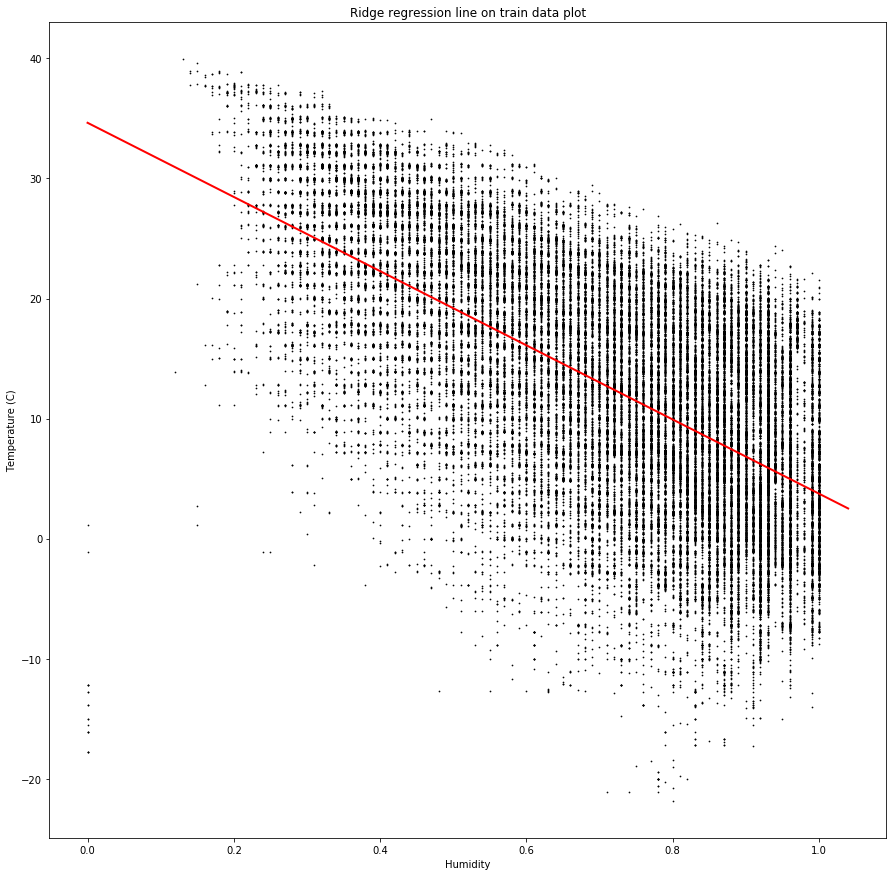

In [24]:
plt.figure(figsize=(15,15))

beta = fit_ridge_regression(xTrain,yTrain,l=1.5)
plt.scatter(xTrain,yTrain, color='k', s=0.5)
xCurve = np.arange(0,1.05,0.01)
yCurve = [beta[0]+beta[1]*x for x in xCurve]
plt.plot(xCurve, yCurve, color='r', linewidth=2)
plt.title('Ridge regression line on train data plot')
plt.xlabel('Humidity')
plt.ylabel('Temperature (C)')

#### fit_ridge_regression line on Test set

Text(0, 0.5, 'Temperature (C)')

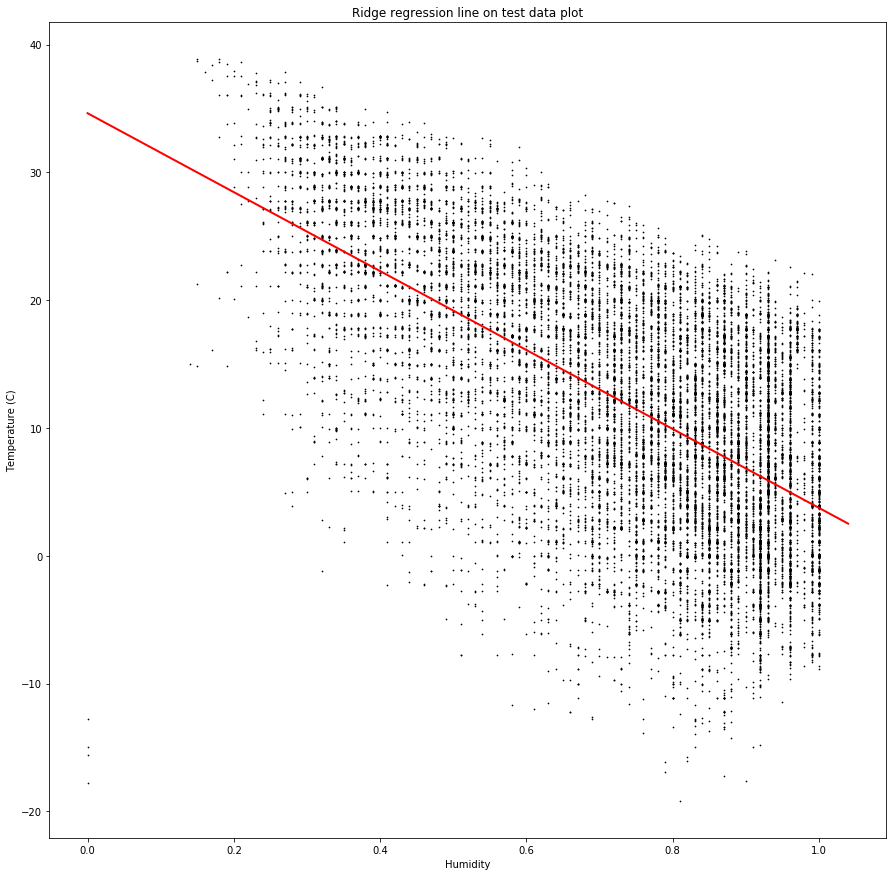

In [25]:
plt.figure(figsize=(15,15))

beta = fit_ridge_regression(xTrain,yTrain,l=1.5)
plt.scatter(xTest,yTest, color='k', s=0.5)
xCurve = np.arange(0,1.05,0.01)
yCurve = [beta[0]+beta[1]*x for x in xCurve]
plt.plot(xCurve, yCurve, color='r', linewidth=2)
plt.title('Ridge regression line on test data plot')
plt.xlabel('Humidity')
plt.ylabel('Temperature (C)')

### Ridge regression function not to penalize b0

#### fit_ridge_regression_without_b0 on train data

Text(0, 0.5, 'Temperature (C)')

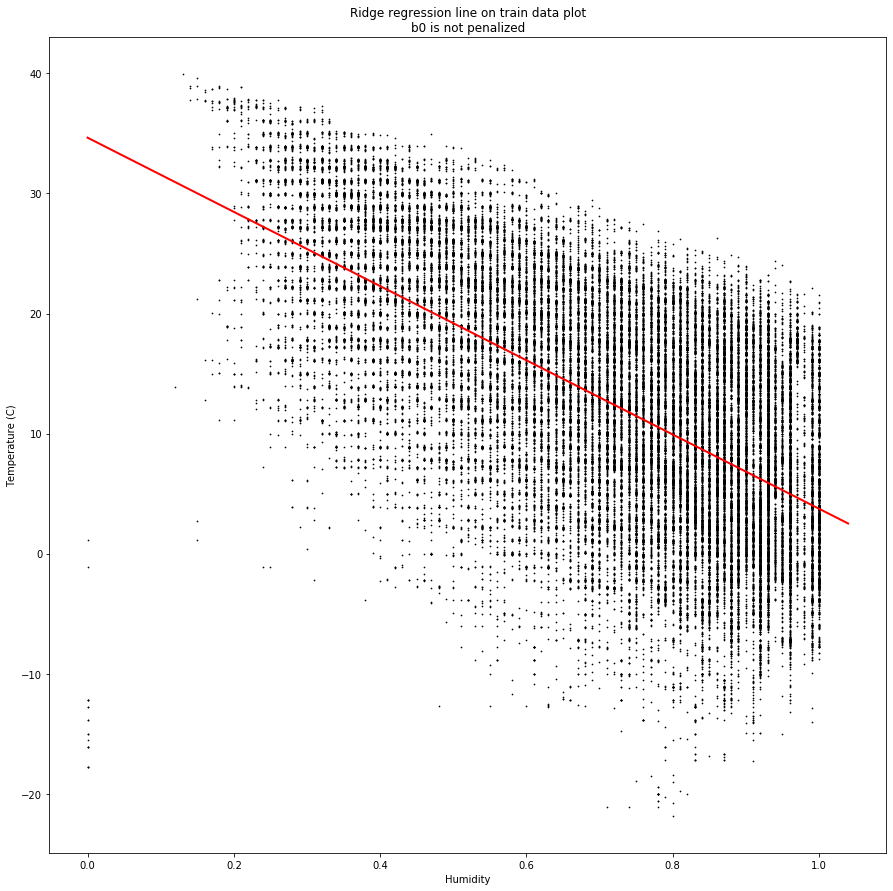

In [26]:
plt.figure(figsize=(15,15))

beta = fit_ridge_regression_without_b0(xTrain,yTrain,l=1.5)
plt.scatter(xTrain,yTrain, color='k', s=0.5)
xCurve = np.arange(0,1.05,0.01)
yCurve = [beta[0]+beta[1]*x for x in xCurve]
plt.plot(xCurve, yCurve, color='r', linewidth=2)
plt.title('Ridge regression line on train data plot\nb0 is not penalized')
plt.xlabel('Humidity')
plt.ylabel('Temperature (C)')

#### fit_ridge_regression_without_b0 on test data

Text(0, 0.5, 'Temperature (C)')

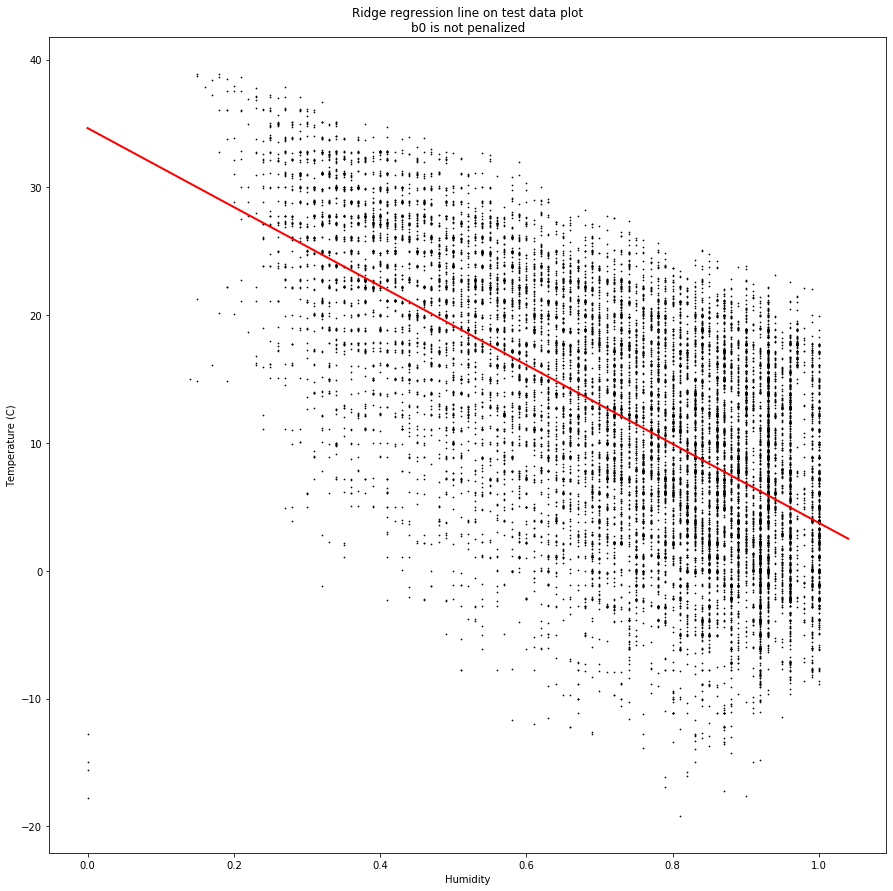

In [27]:
plt.figure(figsize=(15,15))

beta = fit_ridge_regression_without_b0(xTrain,yTrain,l=1.5)
plt.scatter(xTest,yTest, color='k', s=0.5)
xCurve = np.arange(0,1.05,0.01)
yCurve = [beta[0]+beta[1]*x for x in xCurve]
plt.plot(xCurve, yCurve, color='r', linewidth=2)
plt.title('Ridge regression line on test data plot\nb0 is not penalized')
plt.xlabel('Humidity')
plt.ylabel('Temperature (C)')

#### Polynomial regression line (degree=2) on train data plot

Text(0, 0.5, 'Temperature (C)')

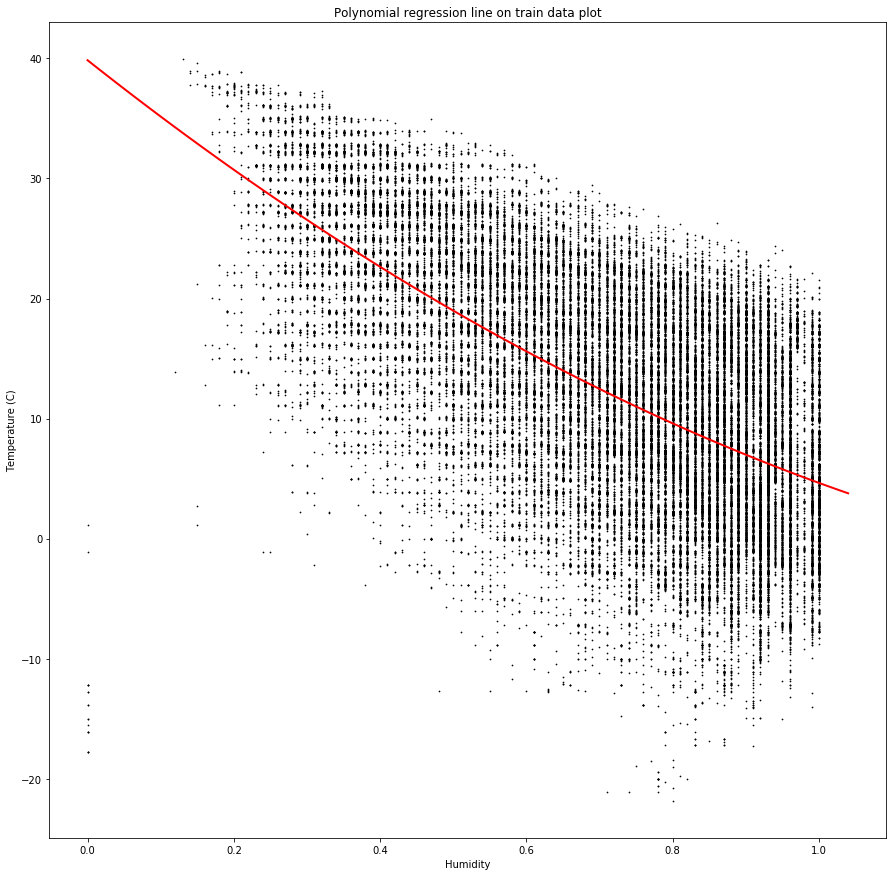

In [28]:
plt.figure(figsize=(15,15))

beta = fit_polynomial_regression(xTrain, yTrain, degree=2)

plt.scatter(xTrain,yTrain, color='k', s=0.5)
xCurve = np.arange(0,1.05,0.01)
yCurve = [sum(beta[i]*x**i for i in range(len(beta))) for x in xCurve]
plt.plot(xCurve, yCurve, color='r', linewidth=2)
plt.title('Polynomial regression line on train data plot')
plt.xlabel('Humidity')
plt.ylabel('Temperature (C)')

In [29]:
g = [1,2,3]
d = sum(g[i]**2 for i in range(len(g)))
d

14

Text(0, 0.5, 'Temperature (C)')

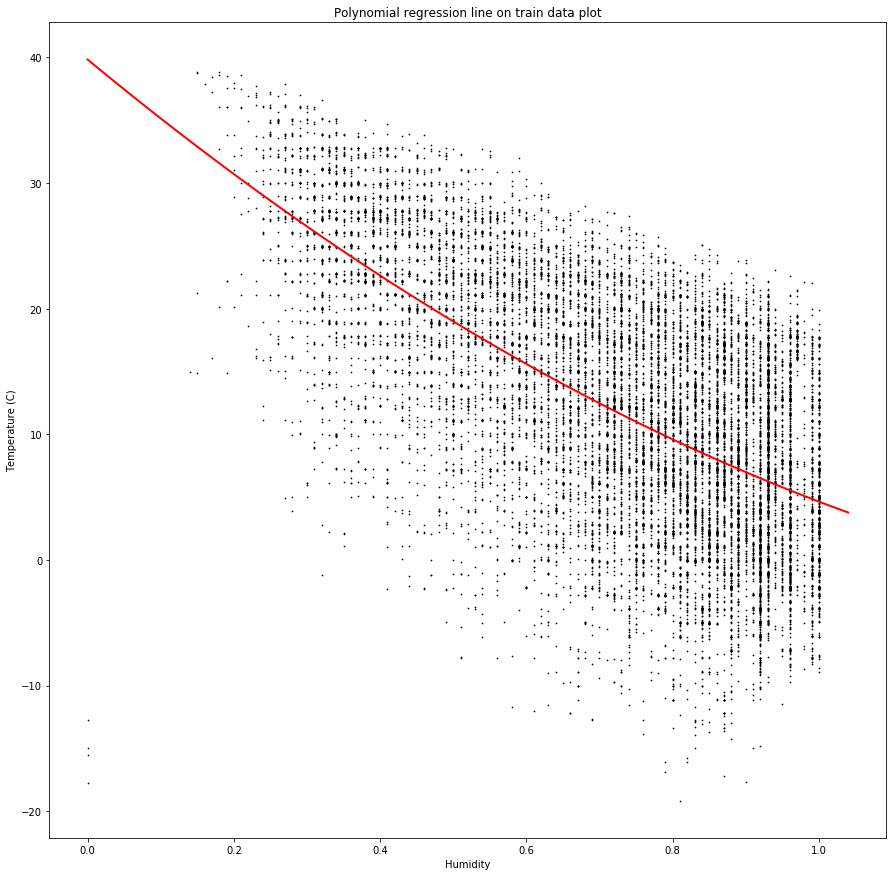

In [30]:
plt.figure(figsize=(15,15))

beta = fit_polynomial_regression(xTrain, yTrain, degree=2)

plt.scatter(xTest,yTest, color='k', s=0.5)
xCurve = np.arange(0,1.05,0.01)
yCurve = [sum(beta[i]*x**i for i in range(len(beta))) for x in xCurve]
plt.plot(xCurve, yCurve, color='r', linewidth=2)
plt.title('Polynomial regression line on train data plot')
plt.xlabel('Humidity')
plt.ylabel('Temperature (C)')

### Calculate RMSE (root mean squared error) for ridge and polynomial regressions

In [31]:
# calculate via formulas and sums not via sklearn

df = pd.read_csv('weatherHistory.csv')
df.drop(['Formatted Date', 'Summary', 'Precip Type', 'Daily Summary'], axis=1, inplace=True)
df = df[['Temperature (C)', 'Humidity', 'Visibility (km)']]
df.head()

,Temperature (C),Humidity,Visibility (km)
0,9.472222,0.89,15.8263
1,9.355556,0.86,15.8263
2,9.377778,0.89,14.9569
3,8.288889,0.83,15.8263
4,8.755556,0.83,15.8263


#### Ridge one dimensional case

In [414]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(df[['Humidity']], df[['Temperature (C)']], test_size=0.2, random_state=42)

In [415]:
b = fit_ridge_regression(xTrain,yTrain,l=1.5)

rmse_rdg = np.sqrt(sum((y-sum(b[i] * x ** i for i in range(len(b))))**2 
                       for x, y in zip(xTrain.values, yTrain.values))/len(xTrain))
print('RMSE_rdg_train=', rmse_rdg[0])

RMSE_rdg_train= 7.384538178241273


In [416]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error as mse
rdg=Ridge(alpha=1.5)
rdg.fit(xTrain,yTrain)
y_pred_rdg = rdg.predict(xTrain)
rmse_rdgs = np.sqrt(mse(yTrain,y_pred_rdg))
print('RMSE_rdgs_train=', rmse_rdgs)

RMSE_rdgs_train= 7.384536660457925


In [35]:
b = fit_ridge_regression(xTrain,yTrain,l=1.5)

rmse_rdg = np.sqrt(sum((y-sum(b[i] * x ** i for i in range(len(b))))**2 
                       for x, y in zip(xTest.values, yTest.values))/len(xTest))
print('RMSE_rdg_test=', rmse_rdg[0])

RMSE_rdg_test= 7.462150939400165


In [36]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error as mse
rdg=Ridge(alpha=1.5)
rdg.fit(xTrain,yTrain)
y_pred_rdg = rdg.predict(xTest)
rmse_rdgs = np.sqrt(mse(yTest,y_pred_rdg))
print('RMSE_rdgs_test=', rmse_rdgs)

RMSE_rdgs_test= 7.462157461207592


#### Ridge k dimensional case

In [95]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(df[df.columns.difference(['Temperature (C)'])], df[['Temperature (C)']], test_size=0.2, random_state=42)

In [38]:
b = fit_ridge_regression(xTrain,yTrain,l=1.5)
X = xTrain.copy()
X['Intrcpt']=1
X = X[['Intrcpt'] + xTrain.columns.difference(['Intrcpt']).tolist()]
y = yTrain.copy()
rmse_rdg = np.sqrt((np.dot(np.subtract(y,X.dot(b)).T,(np.subtract(y,X.dot(b)))))/len(y))[0][0]
print('RMSE_rdg_train=', rmse_rdg)

RMSE_rdg_train= 7.201121541536773


In [39]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error as mse
rdg=Ridge(alpha=1.5)
rdg.fit(xTrain,yTrain)

y_pred_rdg = rdg.predict(xTrain)
rmse_rdgs = np.sqrt(mse(yTrain,y_pred_rdg))
print('RMSE_rdgs_train=', rmse_rdgs)

RMSE_rdgs_train= 7.201119772169841


In [40]:
b = fit_ridge_regression(xTrain,yTrain,l=1.5)
X = xTest.copy()
X['Intrcpt']=1
X = X[['Intrcpt'] + xTest.columns.difference(['Intrcpt']).tolist()]
y = yTest.copy()
rmse_rdg = np.sqrt((np.dot(np.subtract(y,X.dot(b)).T,(np.subtract(y,X.dot(b)))))/len(y))[0][0]
print('RMSE_rdg_test=', rmse_rdg)

RMSE_rdg_test= 7.277330973747499


In [41]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error as mse
rdg=Ridge(alpha=1.5)
rdg.fit(xTrain,yTrain)

y_pred_rdg = rdg.predict(xTest)
rmse_rdgs = np.sqrt(mse(yTest,y_pred_rdg))
print('RMSE_rdgs_test=', rmse_rdgs)

RMSE_rdgs_test= 7.277343115335162


#### Ridge k dimensional case not penalizing b0

In [42]:
b = fit_ridge_regression_without_b0(xTrain,yTrain,l=1.5)
X = xTrain.copy()
X['Intrcpt']=1
X = X[['Intrcpt'] + xTrain.columns.difference(['Intrcpt']).tolist()]
y = yTrain.copy()
rmse_rdg = np.sqrt((np.dot(np.subtract(y,X.dot(b)).T,(np.subtract(y,X.dot(b)))))/len(y))[0][0]
print('RMSE_rdg_train=', rmse_rdg)

RMSE_rdg_train= 7.201119772169841


In [43]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error as mse
rdg=Ridge(alpha=1.5)
rdg.fit(xTrain,yTrain)

y_pred_rdg = rdg.predict(xTrain)
rmse_rdgs = np.sqrt(mse(yTrain,y_pred_rdg))
print('RMSE_rdgs_train=', rmse_rdgs)

RMSE_rdgs_train= 7.201119772169841


In [44]:
b = fit_ridge_regression_without_b0(xTrain,yTrain,l=1.5)
X = xTest.copy()
X['Intrcpt']=1
X = X[['Intrcpt'] + xTest.columns.difference(['Intrcpt']).tolist()]
y = yTest.copy()
rmse_rdg = np.sqrt((np.dot(np.subtract(y,X.dot(b)).T,(np.subtract(y,X.dot(b)))))/len(y))[0][0]
print('RMSE_rdg_test=', rmse_rdg)

RMSE_rdg_test= 7.277343115335163


In [45]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error as mse
rdg=Ridge(alpha=1.5)
rdg.fit(xTrain,yTrain)

y_pred_rdg = rdg.predict(xTest)
rmse_rdgs = np.sqrt(mse(yTest,y_pred_rdg))
print('RMSE_rdgs_test=', rmse_rdgs)

RMSE_rdgs_test= 7.277343115335162


#### Polynomial one dim case

In [389]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(df[['Humidity']], df[['Temperature (C)']], test_size=0.2, random_state=42)

In [390]:
b = fit_polynomial_regression1(xTrain, yTrain, degree=3)
b

['Intercept', 'Humidity', 'Humidity^2', 'Humidity^3']


array([[  23.02581284],
       [  43.92096138],
       [-140.10803583],
       [  79.15189342]])

In [392]:
rmse = np.sqrt(sum((y-sum(b[i]*x**i for i in range(len(b))))**2 for x,y in zip(xTrain.values, yTrain.values))/len(xTrain))
rmse[0]

7.336512290048046

In [397]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import PolynomialFeatures
degree = 3
poly_features = PolynomialFeatures(degree = degree)
poly_xTrain = poly_features.fit_transform(np.array(xTrain).reshape(-1,1))
poly_model = LinearRegression(fit_intercept=False)
poly_model.fit(poly_xTrain,yTrain)
y_pred = poly_model.predict(poly_xTrain)
rmse = np.sqrt(mse(y_pred,yTrain))
rmse

7.336512290048073

#### Polynomial k dim case

In [404]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(df[df.columns.difference(['Temperature (C)'])], df[['Temperature (C)']], test_size=0.2, random_state=42)

In [405]:
beta = fit_polynomial_regression1(xTrain, yTrain, degree=3)
beta

['Intercept', 'Humidity', 'Visibility (km)', 'Humidity^2', 'Visibility (km)^2', 'Humidity^3', 'Visibility (km)^3']


array([[ 5.24018671e+00],
       [ 9.81686712e+01],
       [ 9.77674380e-02],
       [-2.57148622e+02],
       [ 1.73487587e-01],
       [ 1.56598486e+02],
       [-8.58945317e-03]])

In [406]:
def rmse_poly1(xTrain, yTrain, xTest, yTest, degree=2):
    b = fit_polynomial_regression1(xTrain, yTrain, degree)
    X = xTest.copy()
    y = yTest
    features = ['Intercept'] + X.columns.tolist()

    for i in range(2, degree+1):            
        for feature in X.columns:
            s = str(feature) + '^' + str(i)
            X[s] = X[feature]**i
            features.append(s)
            
    X['Intercept'] = 1
    X = X[features]
    
    rmse = np.sqrt((np.dot(np.subtract(y,X.dot(b)).T,(np.subtract(y,X.dot(b)))))/len(y))[0][0]
    
    return rmse

In [407]:
rmse_poly = rmse_poly1(xTrain, yTrain, xTrain, yTrain, degree=2)
rmse_poly

['Intercept', 'Humidity', 'Visibility (km)', 'Humidity^2', 'Visibility (km)^2']


7.040217879097765

In [409]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error as mse

degree = 3
poly_features = PolynomialFeatures(degree = degree)
poly_xTrain = poly_features.fit_transform(np.asarray(xTrain).reshape(-1,len(xTrain.columns)))
poly_model = LinearRegression()
poly_model.fit(poly_xTrain,yTrain)
y_pred = poly_model.predict(poly_xTrain)
rmse_poly = np.sqrt(mse(y_pred,yTrain))
print('RMSE_poly_train=', rmse_poly, '\n')
#print(poly_model.coef_)
#print(poly_xTrain)
# ?   4.93 ավելորդ է բերում մի սյունը  fit_transform(np.asarray(xTrain).reshape(-1,len(xTrain.columns)))
# 3.1958 coefficient also ավելորդ է

# Ավելորդ չի y = x1 + x2 + ... + x1^2+x2^2 +... + x1*x2 + ... ընդհանուր տարբերակն է sklearn- ում հաշվում

RMSE_poly_train= 6.881732854717402 



#### rmse calculation via `fit_polynomial_regression2` wich performs as sklearn version taking into calculation cross products of the features 

In [410]:
def rmse_poly2(xTrain, yTrain, xTest, yTest, degree=2):
    
    """
    Calculates RMSE for polynomial regression 
    params:
    xTrain, yTrain for training
    xTest, yTest for prediction/testing
    """
    b = fit_polynomial_regression2(xTrain, yTrain, degree)
    X = xTest.copy()
    y = yTest
    cols = X.columns
    
    features = ['Intercept'] + cols.tolist()
    
    for k in range(2,degree+1):
        featurelst = it.combinations_with_replacement(cols,k)
        for f in featurelst:
            s=""
            for el in set(f):       # set(f) selecting unique values in tuple  
                if f.count(el)>1:
                    s += str(el) + "^" + str(f.count(el)) + "*"
                else:
                    s += str(el)+"*" 
            features.append(s)
            X[s] = 1
            for el in f:
                X[s] *= X[el]
            
    X['Intercept'] = 1
    X = X[features]
    
    rmse = np.sqrt((np.dot(np.subtract(y,X.dot(b)).T,(np.subtract(y,X.dot(b)))))/len(y))[0][0]
    
    return rmse

In [411]:
rmse_poly = rmse_poly2(xTrain, yTrain, xTrain, yTrain, degree=3)
rmse_poly

['Intercept', 'Humidity', 'Visibility (km)', 'Humidity^2*', 'Humidity*Visibility (km)*', 'Visibility (km)^2*', 'Humidity^3*', 'Humidity^2*Visibility (km)*', 'Humidity*Visibility (km)^2*', 'Visibility (km)^3*']


6.881732854717403

### Now fit the ridge and polynomial regressions to your data using sklearn and compare the results with your own fit_1d_linear_regression function. Use RMSE for comparison.

In [53]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(df[['Humidity']], df[['Temperature (C)']], test_size=0.2, random_state=42)

In [417]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error as mse

clf = Ridge(alpha=1.5)
clf.fit(xTrain,yTrain)
y_pred = clf.predict(xTrain)
rmse = np.sqrt(mse(y_pred,yTrain))
rmse

7.384536660457925

In [412]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error as mse

degree = 3
poly_features = PolynomialFeatures(degree = degree)
poly_xTrain = poly_features.fit_transform(np.asarray(xTrain).reshape(-1,len(xTrain.columns)))
poly_model = LinearRegression()
poly_model.fit(poly_xTrain,yTrain)
y_pred = poly_model.predict(poly_xTrain)
rmse_poly = np.sqrt(mse(y_pred,yTrain))
print('RMSE_poly_train=', rmse_poly, '\n')

RMSE_poly_train= 6.881732854717402 



## Ridge polynomial regression k dim general case, not penalizing b0

In [526]:
import itertools as it

def fit_ridge_polynomial_regression(data_vector, response_vector, degree=2, l=1.5):
    """
    Returns coefficient order corresponding x1+x2+x3+...+x1^2+...+x1*x2 + x1*x3 + x2*x3 +... ++x2^2+ ...+x1^3+... x1*x2*x3+...+x2^3    !!!
    For Ridge fits not penalizing b0
    
    :param data_vector: A pandas dataframe,
                        where each column contains feature data (x)
    :param response_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is label (y)
    :return: numpy array beta of coefficients of the regression
    """
    
    X = data_vector.copy()
    y = response_vector
    cols = data_vector.columns
    
    features = ['Intercept'] + cols.tolist()
    
    for k in range(2,degree+1):
        featurelst = it.combinations_with_replacement(cols,k)
        for f in featurelst:
            s=""
            for el in set(f):       # set(f) selecting unique values in tuple  
                if f.count(el)>1:
                    s += str(el) + "^" + str(f.count(el)) + "*"
                else:
                    s += str(el)+"*" 
            features.append(s)
            X[s] = 1
            for el in f:
                X[s] *= X[el]
            
    #print(features)
    
    X['Intercept'] = 1
    X = X[features]
    
    # calculating ridge betas:
    
    Isp = np.identity(len(X.columns))
    Isp[0][0] = 0
    beta = np.linalg.multi_dot([np.linalg.inv(np.dot(X.T,X)+l*Isp),X.T,y])   # b0 is not penalized
     
    return beta

In [424]:
b = fit_ridge_polynomial_regression(xTrain, yTrain, degree=2, l=1.5)
b

['Intercept', 'Humidity', 'Humidity^2*']


array([[ 39.43894091],
       [-46.89192302],
       [ 12.03836999]])

In [434]:
b = fit_ridge_polynomial_regression(xTrain, yTrain, degree=2, l=1.5)

X = xTrain.copy()
y = yTrain.copy()

cols = xTrain.columns
    
features = ['Intercept'] + cols.tolist()

for k in range(2,degree+1):
    featurelst = it.combinations_with_replacement(cols,k)
    for f in featurelst:
        s=""
        for el in set(f):       # set(f) selecting unique values in tuple  
            if f.count(el)>1:
                s += str(el) + "^" + str(f.count(el)) + "*"
            else:
                s += str(el)+"*" 
        features.append(s)
        X[s] = 1
        for el in f:
            X[s] *= X[el]

X['Intercept'] = 1
X = X[features]

rmse_rdg = np.sqrt((np.dot(np.subtract(y,X.dot(b)).T,(np.subtract(y,X.dot(b)))))/len(y))[0][0]
print('RMSE_rdg_train=', rmse_rdg)

['Intercept', 'Humidity', 'Humidity^2*']
RMSE_rdg_train= 7.367476132396812


In [433]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error as mse

degree = 2
poly_features = PolynomialFeatures(degree = degree)
poly_xTrain = poly_features.fit_transform(np.asarray(xTrain).reshape(-1,len(xTrain.columns)))
poly_model = Ridge(alpha=1.5)
poly_model.fit(poly_xTrain,yTrain)
y_pred = poly_model.predict(poly_xTrain)
rmse_poly = np.sqrt(mse(y_pred,yTrain))
print('RMSE_poly_train=', rmse_poly, '\n')

RMSE_poly_train= 7.367476132396816 



### Use any additional visualizations that may help during your analysis.

#### Fit polynomial regression one dim

In [487]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(df[['Humidity']], df[['Temperature (C)']], test_size=0.2, random_state=42)

   rmse_train  rmse_test
1       7.385      7.462
2       7.367      7.445
3       7.337      7.417
4       7.322      7.408
5       7.318      7.402
6       7.307      7.390
7       7.307      7.389
8       7.305      7.387
9       7.305      7.386


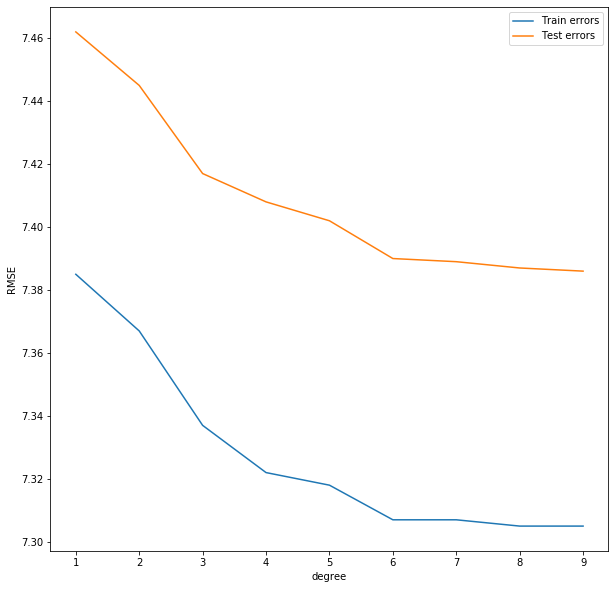

In [480]:
train_errors = []
test_errors = []
for k in range(1,10):
    b = fit_polynomial_regression1(xTrain, yTrain, degree=k)
    rmse_train = np.sqrt(sum((y-sum(b[i]*x**i for i in range(len(b))))**2 for 
                             x,y in zip(xTrain.values,yTrain.values))/len(xTrain))
    rmse_test = np.sqrt(sum((y-sum(b[i]*x**i for i in range(len(b))))**2 for 
                             x,y in zip(xTest.values,yTest.values))/len(xTest))
    train_errors.append(rmse_train[0].round(3))
    test_errors.append(rmse_test[0].round(3))

errorlist = pd.DataFrame({'rmse_train':list(train_errors), 'rmse_test':list(test_errors)}, index=range(1,10))  
print(errorlist)
plt.figure(figsize=(10,10))
plt.plot(range(1,10), train_errors, label='Train errors')
plt.xlabel('degree')
plt.ylabel('RMSE')
plt.plot(range(1,10), test_errors, label='Test errors')
plt.legend()
plt.show()

## Scatter plot Humidity vs Temperature: Polinomial fit degree = 6 
### as above elbow graph shows that after degree>=6 there is no substancial decrease in RMSE

In [512]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(df[['Humidity']], df[['Temperature (C)']], test_size=0.2, random_state=42)

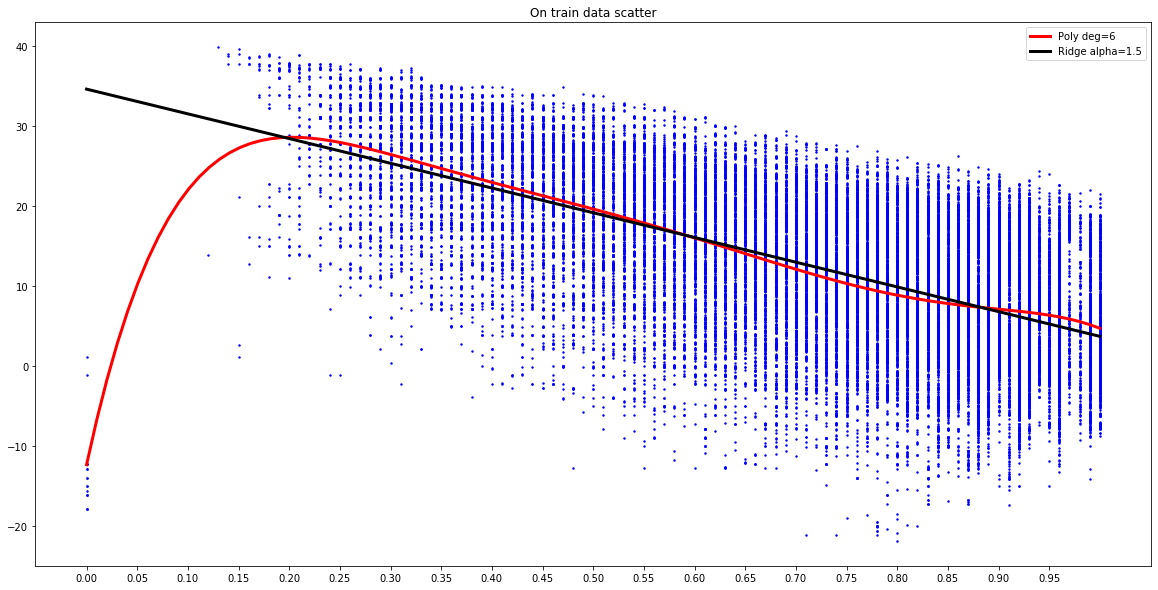

In [519]:
b = fit_polynomial_regression1(xTrain, yTrain, degree=6)
plt.figure(figsize=(20,10))
plt.scatter(xTrain,yTrain,s=2,c='b')
xCurve=np.linspace(0,1,100)
yCurve=[sum(b[i]*x**i for i in range(len(b))) for x in xCurve]
plt.plot(xCurve,yCurve, linewidth=3, color='r', label="Poly deg=6")
plt.xticks(np.arange(0,1,0.05))

brdg = fit_ridge_regression(xTrain,yTrain,l=1.5)
yCurve_rdg=[sum(brdg[i]*x**i for i in range(len(brdg))) for x in xCurve]
plt.plot(xCurve,yCurve_rdg, linewidth=3, color='k', label='Ridge alpha=1.5')
plt.legend()
plt.title("On train data scatter")
plt.show()

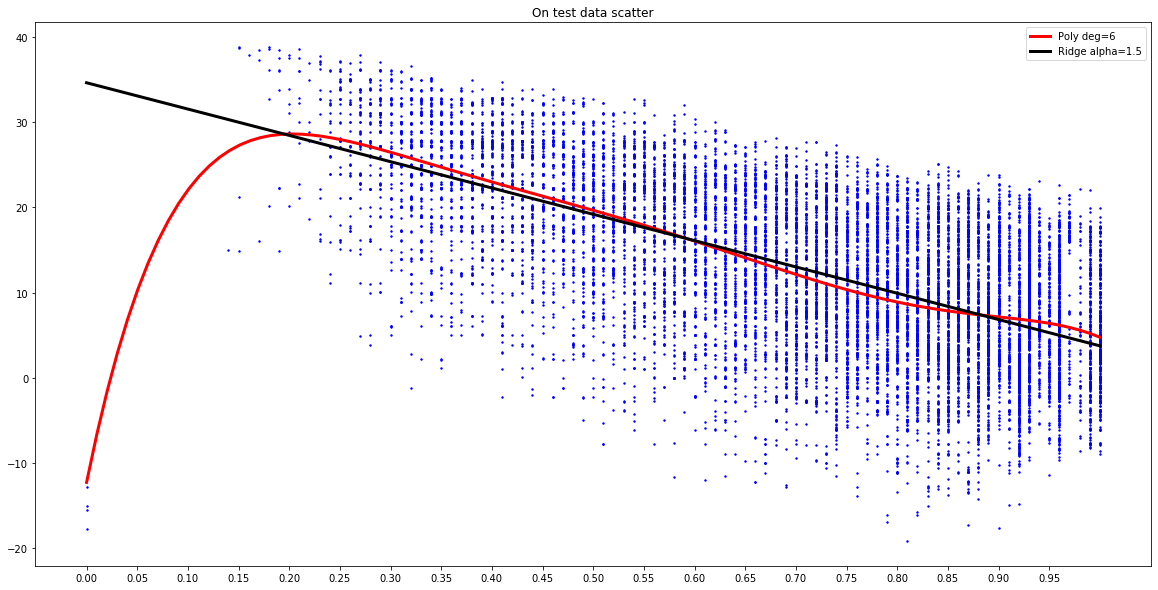

In [520]:
b = fit_polynomial_regression1(xTrain, yTrain, degree=6)
plt.figure(figsize=(20,10))
plt.scatter(xTest,yTest,s=2,c='b')
xCurve=np.linspace(0,1,100)
yCurve=[sum(b[i]*x**i for i in range(len(b))) for x in xCurve]
plt.plot(xCurve,yCurve, linewidth=3, color='r', label="Poly deg=6")
plt.xticks(np.arange(0,1,0.05))

brdg = fit_ridge_regression(xTrain,yTrain,l=1.5)
yCurve_rdg=[sum(brdg[i]*x**i for i in range(len(brdg))) for x in xCurve]
plt.plot(xCurve,yCurve_rdg, linewidth=3, color='k', label='Ridge alpha=1.5')
plt.legend()
plt.title("On test data scatter")
plt.show()

#### Fit polynomial regression k dim
#### rmse calculation via `fit_polynomial_regression2` wich performs as sklearn version taking into calculation cross products of the features

In [521]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(df[df.columns.difference(['Temperature (C)'])], df[['Temperature (C)']], test_size=0.2, random_state=42)

   rmse_train  rmse_test
1       7.201      7.277
2       7.040      7.115
3       6.882      6.961
4       6.863      6.939
5       6.841      6.909
6       6.823      6.889
7       6.813      6.884
8       6.795      6.868
9       6.802      6.874


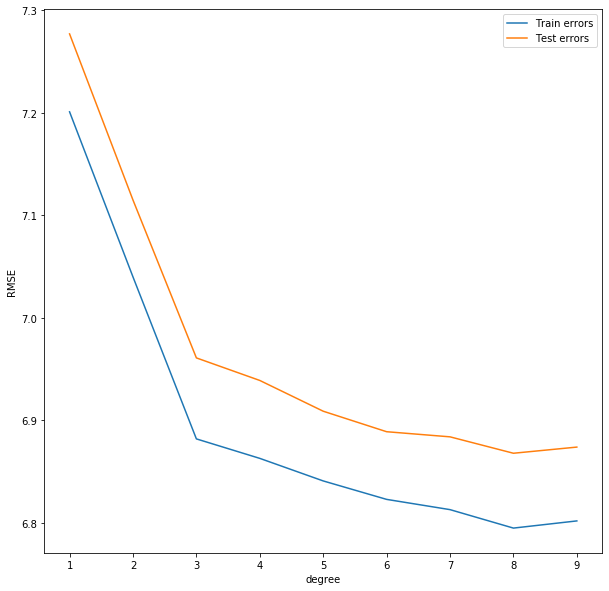

In [486]:
train_errors = []
test_errors = []
for k in range(1,10):
    rmse_train = rmse_poly2(xTrain, yTrain, xTrain, yTrain, degree=k)
    rmse_test = rmse_poly2(xTrain, yTrain, xTest, yTest, degree=k)
    train_errors.append(rmse_train.round(3))
    test_errors.append(rmse_test.round(3))

errorlist = pd.DataFrame({'rmse_train':list(train_errors), 'rmse_test':list(test_errors)}, index=range(1,10))  
print(errorlist)
plt.figure(figsize=(10,10))
plt.plot(range(1,10), train_errors, label='Train errors')
plt.xlabel('degree')
plt.ylabel('RMSE')
plt.plot(range(1,10), test_errors, label='Test errors')
plt.legend()
plt.show()

    rmse_train  rmse_test
1        7.201      7.277
2        7.040      7.115
3        6.882      6.961
4        6.863      6.939
5        6.841      6.909
6        6.823      6.889
7        6.813      6.884
8        6.795      6.868
9        6.802      6.874
10      27.319     27.354


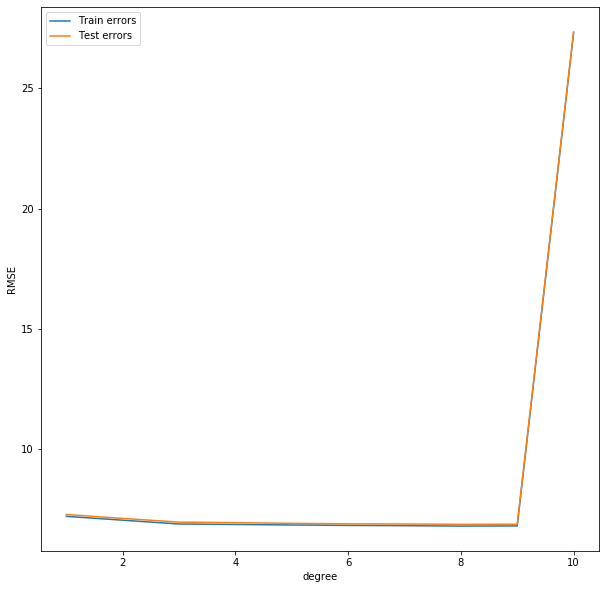

In [485]:
train_errors = []
test_errors = []
for k in range(1,11):
    rmse_train = rmse_poly2(xTrain, yTrain, xTrain, yTrain, degree=k)
    rmse_test = rmse_poly2(xTrain, yTrain, xTest, yTest, degree=k)
    train_errors.append(rmse_train.round(3))
    test_errors.append(rmse_test.round(3))

errorlist = pd.DataFrame({'rmse_train':list(train_errors), 'rmse_test':list(test_errors)}, index=range(1,11))  
print(errorlist)
plt.figure(figsize=(10,10))
plt.plot(range(1,11), train_errors, label='Train errors')
plt.xlabel('degree')
plt.ylabel('RMSE')
plt.plot(range(1,11), test_errors, label='Test errors')
plt.legend()
plt.show()

## Fit Ridge polynomial regression  elbow

In [522]:
import itertools as it
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(df[df.columns.difference(['Temperature (C)'])], df[['Temperature (C)']], test_size=0.2, random_state=42)

In [524]:
def rmse_poly_Ridge(xTrain, yTrain, xTest, yTest, degree=2, l=1.5):
    
    b = fit_ridge_polynomial_regression(xTrain, yTrain, degree, l)
    
    X = xTest.copy()
    y = yTest.copy()

    cols = xTest.columns

    features = ['Intercept'] + cols.tolist()

    for k in range(2,degree+1):
        featurelst = it.combinations_with_replacement(cols,k)
        for f in featurelst:
            s=""
            for el in set(f):       # set(f) selecting unique values in tuple  
                if f.count(el)>1:
                    s += str(el) + "^" + str(f.count(el)) + "*"
                else:
                    s += str(el)+"*" 
            features.append(s)
            X[s] = 1
            for el in f:
                X[s] *= X[el]

    X['Intercept'] = 1
    X = X[features]
    
    rmse_rdg_trn = np.sqrt((np.dot(np.subtract(y,X.dot(b)).T,(np.subtract(y,X.dot(b)))))/len(y))[0][0]
    
    return rmse_rdg_trn    

    rmse_train  rmse_test
1        7.201      7.277
2        7.041      7.116
3        6.915      6.992
4        6.873      6.950
5        6.849      6.920
6        6.845      6.916
7        6.838      6.910
8        6.815      6.886
9        6.804      6.874
10       6.816      6.883


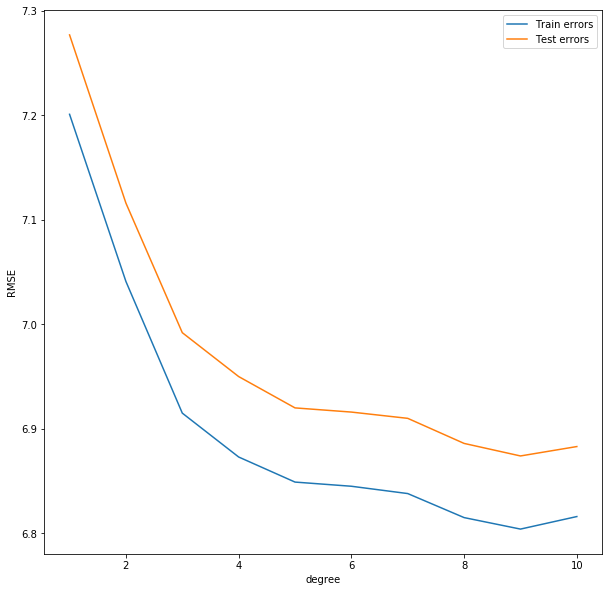

In [529]:
train_errors = []
test_errors = []
for k in range(1,11):
    rmse_train = rmse_poly_Ridge(xTrain, yTrain, xTrain, yTrain, degree=k, l=1.5)
    rmse_test = rmse_poly_Ridge(xTrain, yTrain, xTest, yTest, degree=k, l=1.5)
    train_errors.append(rmse_train.round(3))
    test_errors.append(rmse_test.round(3))

errorlist = pd.DataFrame({'rmse_train':list(train_errors), 'rmse_test':list(test_errors)}, index=range(1,11))  
print(errorlist)
plt.figure(figsize=(10,10))
plt.plot(range(1,11), train_errors, label='Train errors')
plt.xlabel('degree')
plt.ylabel('RMSE')
plt.plot(range(1,11), test_errors, label='Test errors')
plt.legend()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.12284e-17): result may not be accurate.
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.32823e-19): result may not be accurate.
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.14958e-21): result may not be accurate.
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.92063e-24): result may not be accurate.
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.4853e-26): result may not be accurate.
  overwrite_a=True).T


    rmse_train  rmse_test
1        7.201      7.277
2        7.041      7.116
3        6.915      6.992
4        6.873      6.950
5        6.849      6.920
6        6.845      6.916
7        6.838      6.910
8        6.815      6.886
9        6.804      6.874
10       6.799      6.869


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.67941e-29): result may not be accurate.
  overwrite_a=True).T


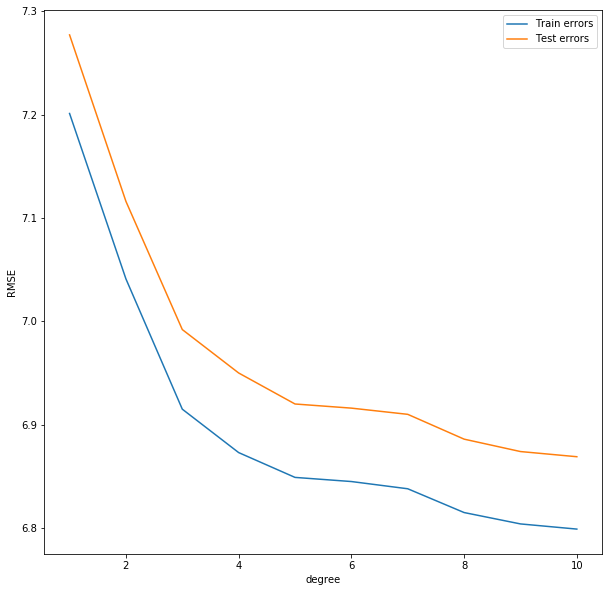

In [540]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error as mse

train_errors = []
test_errors = []
for k in range(1,11):
    poly_features = PolynomialFeatures(degree = k)
    poly_xTrain = poly_features.fit_transform(np.asarray(xTrain).reshape(-1,len(xTrain.columns)))
    poly_xTest = poly_features.fit_transform(np.array(xTest).reshape(-1,len(xTest.columns)))
    poly_model = Ridge(alpha=1.5)
    poly_model.fit(poly_xTrain,yTrain)
    
    y_pred_trn = poly_model.predict(poly_xTrain)
    y_pred_tst = poly_model.predict(poly_xTest)
    rmse_train = np.sqrt(mse(y_pred_trn,yTrain))
    rmse_test = np.sqrt(mse(y_pred_tst,yTest))
    train_errors.append(rmse_train.round(3))
    test_errors.append(rmse_test.round(3))

errorlist = pd.DataFrame({'rmse_train':list(train_errors), 'rmse_test':list(test_errors)}, index=range(1,11))  
print(errorlist)
plt.figure(figsize=(10,10))
plt.plot(range(1,11), train_errors, label='Train errors')
plt.xlabel('degree')
plt.ylabel('RMSE')
plt.plot(range(1,11), test_errors, label='Test errors')
plt.legend()
plt.show()